# Week 3 Exercise: kernel SVM

Advanced Machine Learning for KCS



-------------------------------------------------------------------------------

*The goal is to implement and evaluate different kernels for SVMs for one dataset.*
*We start by importing the necessary libraries.*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
import pandas as pd
import seaborn as sns

# this code is only for suppressing a very specific warning
import warnings
warnings.filterwarnings('ignore', 'Solver terminated early.*')

#### Creating dataset

We generate our random dataset; this will be 2D data that is not linearly separable. In fact, the data will follow concentric rings.

In [3]:
N = 200 # number of samples
c = 0.5 # scale factor between inner and outer circles
noise = 0.1 # noise parameter

# generate data
x_vals, t_vals = datasets.make_circles(n_samples=N, factor=c, noise=noise)
# if a value in y_vals is 1, we leave it at one, but if it is 0, we set it to -1
t_vals = np.where(t_vals, 1, -1)

class1_idxs = np.flatnonzero(t_vals == 1)
class1_x = x_vals[class1_idxs]
class1_t = t_vals[class1_idxs]
class2_idxs = np.flatnonzero(t_vals == -1)
class2_x = x_vals[class2_idxs]
class2_t = t_vals[class2_idxs]

We can take a quick look at our data to get a sense of what we're trying to predict.

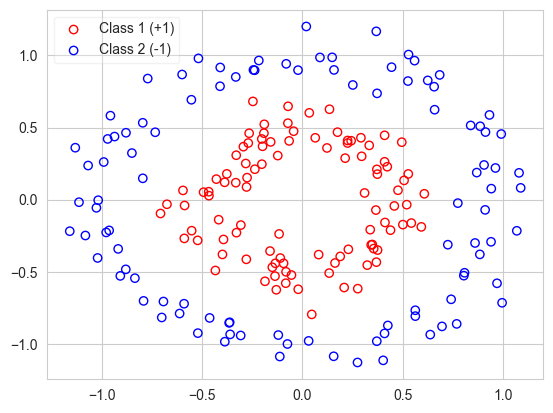

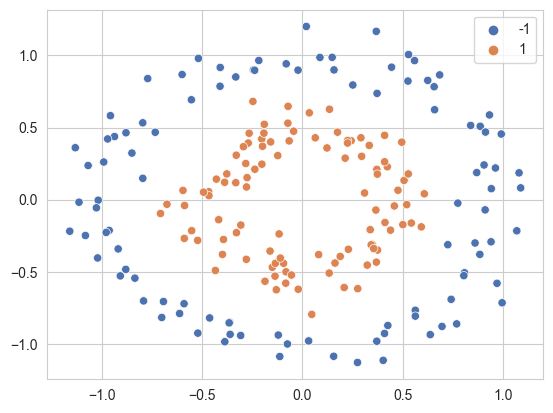

In [4]:
# matplotlib:
plt.scatter(class1_x[:, 0], class1_x[:, 1],
            label = "Class 1 (+1)",
            color = "none",
            edgecolor = "red"
           )
plt.scatter(class2_x[:, 0], class2_x[:, 1],
            label = "Class 2 (-1)",
            color = "none",
            edgecolor = "blue"
           )
plt.legend(loc="upper left", framealpha=0.25)
plt.show()
# simpler with seaborn:
plot_raw = sns.scatterplot(x=x_vals[:,0], y=x_vals[:, 1],
                           hue=t_vals, palette="deep")

## Task:
### (a)
*Implement:*
* *a linear kernel:* $K(\mathbf{x}_1, \mathbf{x}_2) = \mathbf{x}_1^\intercal \mathbf{x}_2$
* *a Gaussian or radial basis function (RBF) kernel:* $K(\mathbf{x}_1, \mathbf{x}_2) = e^{(-\gamma \|\mathbf{x}_1 - \mathbf{x}_2 \|^2)}$
* *a polynomial kernel:* $K(\mathbf{x}_1, \mathbf{x}_2) = (\mathbf{x}_1^\intercal \mathbf{x}_2 + c)^d$

#### Here can can write your solution:

### LINEAR

In [5]:
import numpy as np

def my_kernel(x, t):
    return np.dot(x, t.T)

#### Perform optimisation of the SVM via a manual iteration

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function
We start the training loop for the SVM.  We will randomly choose a batch of points and run the train step.  Then we calculate the loss and accuracy.

In [6]:
# set up the SVM model
# we use max_iter=1 so that we can iterate manually below
clf = svm.SVC(kernel=my_kernel, max_iter=1, tol=0.001)
batch_size = N  # we start with a batch size equal of the dataset size, but we can try out smaller ones!
epochs = 10000

# training loop
temp_losses = []
batch_accs = []
np.random.seed(0) # set this for your experiments to compare the different kernels
for i in range(epochs):
    # generate random indices equal to batch_size
    batch_idxs = np.random.choice(N, size=batch_size)
    # get the corresponding input and target points
    batch_x = x_vals[batch_idxs]
    batch_t = t_vals[batch_idxs][:,]
    #print(np.shape(batch_x), np.shape(batch_t))

    # train the model with this batch
    clf.fit(batch_x, batch_t)

    # calculate temporary train accuracy
    accuracy = clf.score(batch_x, batch_t)
    batch_accs.append(accuracy)

    if (i+1)%1000==0:
        print("Step #{}".format(i+1))
        print("Accuracy = ", accuracy)

Step #1000
Accuracy =  0.56
Step #2000
Accuracy =  0.49
Step #3000
Accuracy =  0.52
Step #4000
Accuracy =  0.44
Step #5000
Accuracy =  0.465
Step #6000
Accuracy =  0.43
Step #7000
Accuracy =  0.45
Step #8000
Accuracy =  0.465
Step #9000
Accuracy =  0.46
Step #10000
Accuracy =  0.445


*To plot a pretty picture of the regions we fit, we create a fine mesh to run through our model and get the predictions.*

In [7]:
# find boundaries for contour plot
abscissa_min, abscissa_max = x_vals[:, 0].min()-1, x_vals[:, 0].max()+1
ordinate_min, ordinate_max = x_vals[:, 1].min()-1, x_vals[:, 1].max()+1

# generate mesh grid of points
h = .025  # step size in the mesh
xx, yy = np.meshgrid(np.arange(abscissa_min, abscissa_max, h), np.arange(ordinate_min, ordinate_max, h))
xx, yy = np.meshgrid(
    np.linspace(abscissa_min, abscissa_max, 10),
    np.linspace(ordinate_min, ordinate_max, 20)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
print(np.shape(grid_points))

print(xx)
print(yy)
grid_preds = clf.predict(grid_points)  # this is not a clean way to do and will raise a warning (we only process values here, but trained with dataframes that had names), but for our purpose that's fine
grid_preds = grid_preds.reshape(xx.shape)

(200, 2)
[[-2.16073961 -1.68859864 -1.21645767 -0.7443167  -0.27217573  0.19996524
   0.67210621  1.14424718  1.61638815  2.08852912]
 [-2.16073961 -1.68859864 -1.21645767 -0.7443167  -0.27217573  0.19996524
   0.67210621  1.14424718  1.61638815  2.08852912]
 [-2.16073961 -1.68859864 -1.21645767 -0.7443167  -0.27217573  0.19996524
   0.67210621  1.14424718  1.61638815  2.08852912]
 [-2.16073961 -1.68859864 -1.21645767 -0.7443167  -0.27217573  0.19996524
   0.67210621  1.14424718  1.61638815  2.08852912]
 [-2.16073961 -1.68859864 -1.21645767 -0.7443167  -0.27217573  0.19996524
   0.67210621  1.14424718  1.61638815  2.08852912]
 [-2.16073961 -1.68859864 -1.21645767 -0.7443167  -0.27217573  0.19996524
   0.67210621  1.14424718  1.61638815  2.08852912]
 [-2.16073961 -1.68859864 -1.21645767 -0.7443167  -0.27217573  0.19996524
   0.67210621  1.14424718  1.61638815  2.08852912]
 [-2.16073961 -1.68859864 -1.21645767 -0.7443167  -0.27217573  0.19996524
   0.67210621  1.14424718  1.61638815  2.0

*Then we make the plot of our points and our decision boundary.*

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/relational.py:567: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


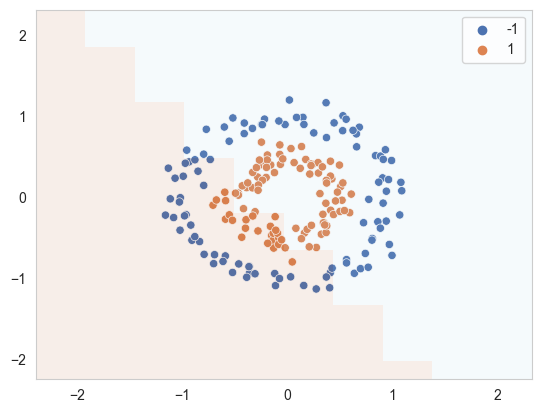

In [8]:
plot_rsk = sns.scatterplot(x=x_vals[:,0], y=x_vals[:,1],
                           hue=t_vals, cmap=plt.cm.Paired, palette="deep")
plot_rsk.pcolormesh(xx, yy, grid_preds, cmap=plt.cm.Paired, alpha=0.1)
plt.show()

We can also plot the accuracy over the training batches:

<AxesSubplot: xlabel='Batch', ylabel='Accuracy'>

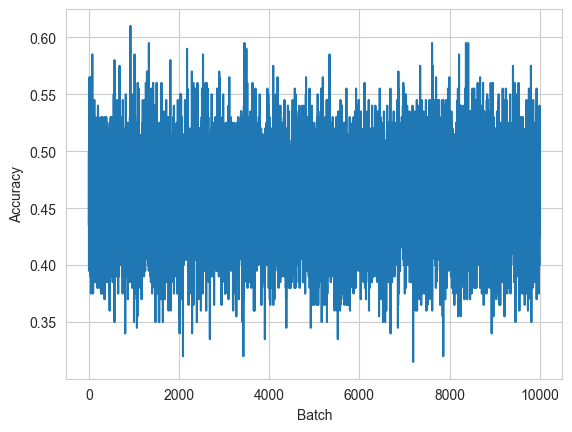

In [10]:
batch_accs_pd = pd.DataFrame({'Batch': [k for k in range(len(batch_accs))], 'Accuracy': batch_accs})
sns.lineplot(data=batch_accs_pd, x="Batch", y="Accuracy")

### GAUSSIAN


Training with Gaussian kernel... gamma=0.2
Step #1000
Accuracy =  0.545
Step #2000
Accuracy =  0.54
Step #3000
Accuracy =  0.615
Step #4000
Accuracy =  0.56
Step #5000
Accuracy =  0.485
Step #6000
Accuracy =  0.575
Step #7000
Accuracy =  0.495
Step #8000
Accuracy =  0.53
Step #9000
Accuracy =  0.46
Step #10000
Accuracy =  0.605


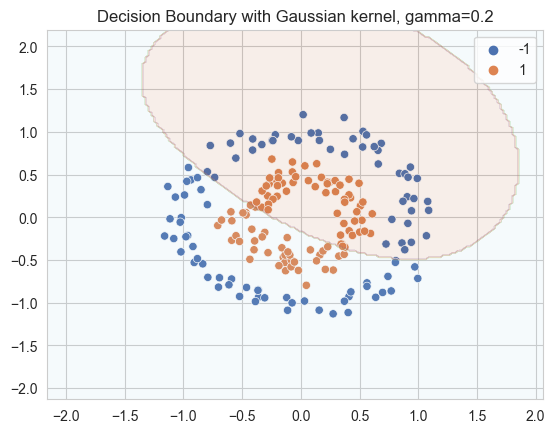

Training with Gaussian kernel... gamma=0.8
Step #1000
Accuracy =  0.705
Step #2000
Accuracy =  0.935
Step #3000
Accuracy =  0.86
Step #4000
Accuracy =  0.79
Step #5000
Accuracy =  0.82
Step #6000
Accuracy =  0.755
Step #7000
Accuracy =  0.88
Step #8000
Accuracy =  0.79
Step #9000
Accuracy =  0.94
Step #10000
Accuracy =  0.845


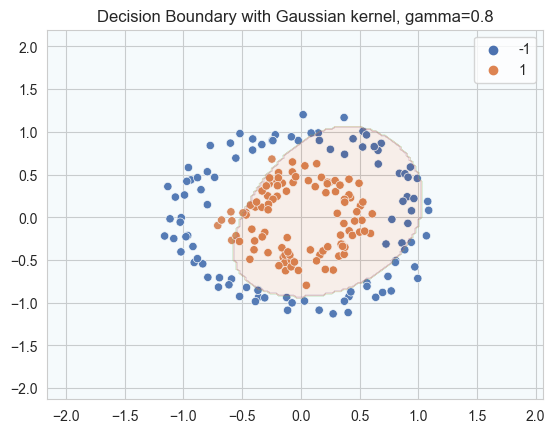

Training with Gaussian kernel... gamma=1
Step #1000
Accuracy =  0.95
Step #2000
Accuracy =  0.875
Step #3000
Accuracy =  0.845
Step #4000
Accuracy =  0.775
Step #5000
Accuracy =  0.91
Step #6000
Accuracy =  0.97
Step #7000
Accuracy =  0.8
Step #8000
Accuracy =  0.945
Step #9000
Accuracy =  0.935
Step #10000
Accuracy =  0.975


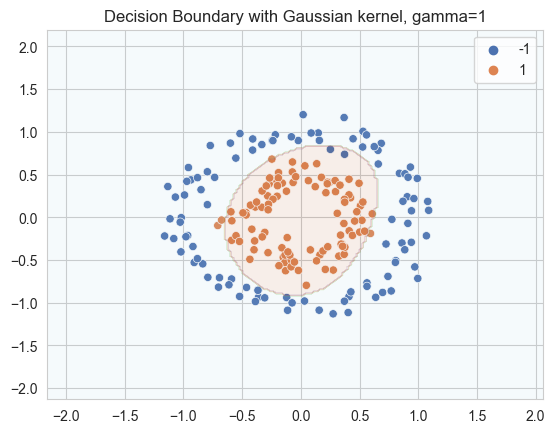

Training with Gaussian kernel... gamma=5
Step #1000
Accuracy =  0.61
Step #2000
Accuracy =  0.62
Step #3000
Accuracy =  0.66
Step #4000
Accuracy =  0.74
Step #5000
Accuracy =  0.715
Step #6000
Accuracy =  0.63
Step #7000
Accuracy =  0.67
Step #8000
Accuracy =  0.73
Step #9000
Accuracy =  0.67
Step #10000
Accuracy =  0.71


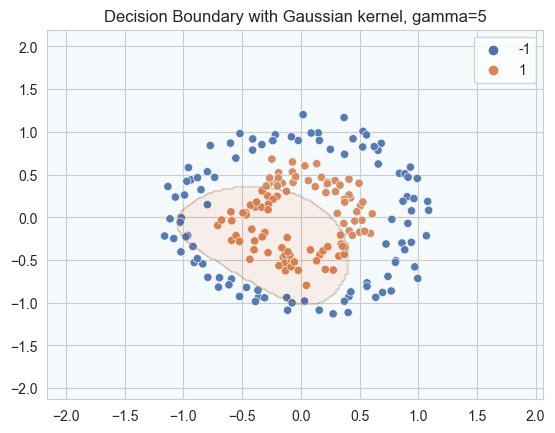

Training with Gaussian kernel... gamma=10
Step #1000
Accuracy =  0.62
Step #2000
Accuracy =  0.575
Step #3000
Accuracy =  0.705
Step #4000
Accuracy =  0.61
Step #5000
Accuracy =  0.62
Step #6000
Accuracy =  0.605
Step #7000
Accuracy =  0.61
Step #8000
Accuracy =  0.665
Step #9000
Accuracy =  0.625
Step #10000
Accuracy =  0.635


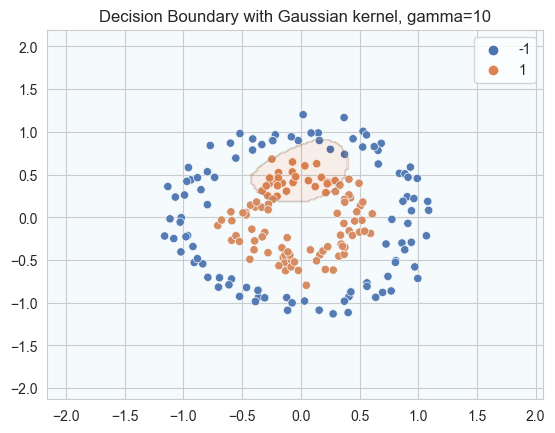

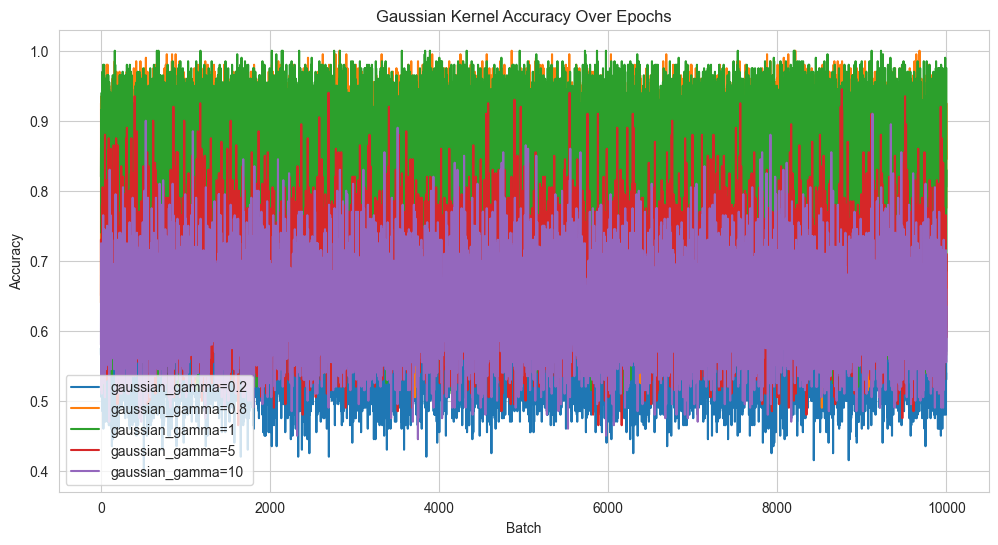

In [13]:
np.random.seed(42)
def gaussian_kernel(x, t, gamma=1.0):
    distance = np.sum(x**2, 1).reshape(-1, 1) + np.sum(t**2, 1) - 2 * np.dot(x, t.T)
    return np.exp(-gamma * distance)

# Set up mesh grid
abscissa_min, abscissa_max = x_vals[:, 0].min()-1, x_vals[:, 0].max()+1
ordinate_min, ordinate_max = x_vals[:, 1].min()-1, x_vals[:, 1].max()+1
h = .025  # step size in the mesh
xx, yy = np.meshgrid(np.arange(abscissa_min, abscissa_max, h), np.arange(ordinate_min, ordinate_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]

gamma_values = [0.2, 0.8, 1, 5, 10]
results_gaussian = {}

for gamma in gamma_values:
    print(f"Training with Gaussian kernel... gamma={gamma}")

    # Initialize the SVM with the Gaussian kernel
    clf = svm.SVC(kernel=lambda x, y: gaussian_kernel(x, y, gamma=gamma), max_iter=1, tol=0.001)

    # Training loop
    batch_accs = []
    for i in range(epochs):
        batch_idxs = np.random.choice(N, size=batch_size)
        batch_x = x_vals[batch_idxs]
        batch_t = t_vals[batch_idxs]
        clf.fit(batch_x, batch_t)

        accuracy = clf.score(batch_x, batch_t)
        batch_accs.append(accuracy)

        if (i+1) % 1000 == 0:
            print("Step #{}".format(i+1))
            print("Accuracy = ", accuracy)

    # Plot decision boundary
    grid_preds = clf.predict(grid_points)
    grid_preds = grid_preds.reshape(xx.shape)
    plt.figure()
    sns.scatterplot(x=x_vals[:,0], y=x_vals[:,1], hue=t_vals, palette="deep")
    plt.contourf(xx, yy, grid_preds, cmap=plt.cm.Paired, alpha=0.1)
    plt.title(f"Decision Boundary with Gaussian kernel, gamma={gamma}")
    plt.show()

    # Save results for the Gaussian kernel
    key_name = f"gaussian_gamma={gamma}"
    results_gaussian[key_name] = batch_accs

# Plotting accuracy for the Gaussian kernel
plt.figure(figsize=(12, 6))
for key_name, accs in results_gaussian.items():
    plt.plot(accs, label=key_name)
plt.legend()
plt.xlabel("Batch")
plt.ylabel("Accuracy")
plt.title("Gaussian Kernel Accuracy Over Epochs")
plt.show()

### POLYNOMIAL

Training with Polynomial kernel... c=0, d=2
Step #1000
Accuracy =  0.68
Step #2000
Accuracy =  0.59
Step #3000
Accuracy =  0.525
Step #4000
Accuracy =  0.69
Step #5000
Accuracy =  0.615
Step #6000
Accuracy =  0.785
Step #7000
Accuracy =  0.63
Step #8000
Accuracy =  0.725
Step #9000
Accuracy =  0.625
Step #10000
Accuracy =  0.74


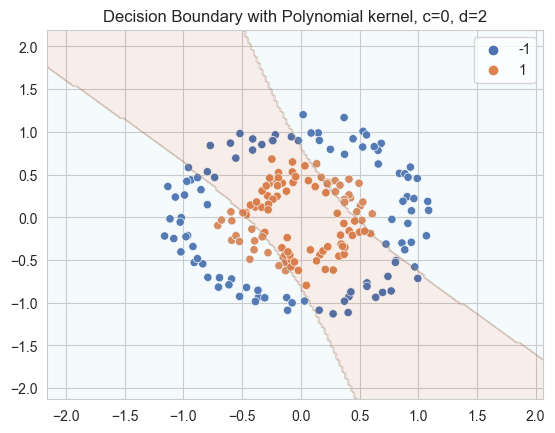

Training with Polynomial kernel... c=0, d=3
Step #1000
Accuracy =  0.42
Step #2000
Accuracy =  0.425
Step #3000
Accuracy =  0.41
Step #4000
Accuracy =  0.415
Step #5000
Accuracy =  0.4
Step #6000
Accuracy =  0.44
Step #7000
Accuracy =  0.42
Step #8000
Accuracy =  0.45
Step #9000
Accuracy =  0.41
Step #10000
Accuracy =  0.5


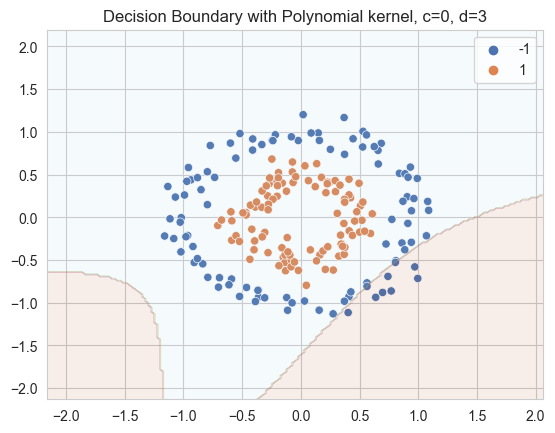

Training with Polynomial kernel... c=1, d=2
Step #1000
Accuracy =  0.5
Step #2000
Accuracy =  0.54
Step #3000
Accuracy =  0.58
Step #4000
Accuracy =  0.57
Step #5000
Accuracy =  0.58
Step #6000
Accuracy =  0.55
Step #7000
Accuracy =  0.49
Step #8000
Accuracy =  0.51
Step #9000
Accuracy =  0.57
Step #10000
Accuracy =  0.595


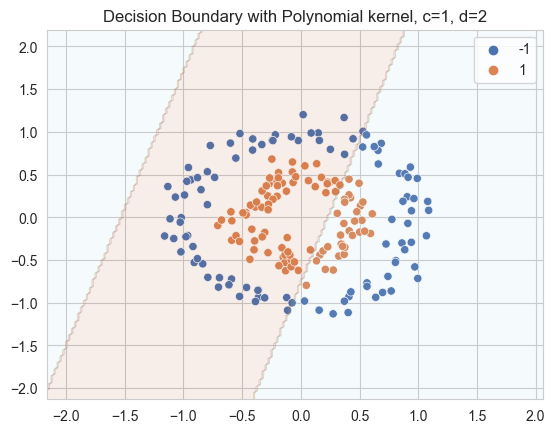

Training with Polynomial kernel... c=1, d=3
Step #1000
Accuracy =  0.53
Step #2000
Accuracy =  0.56
Step #3000
Accuracy =  0.56
Step #4000
Accuracy =  0.56
Step #5000
Accuracy =  0.63
Step #6000
Accuracy =  0.56
Step #7000
Accuracy =  0.565
Step #8000
Accuracy =  0.56
Step #9000
Accuracy =  0.55
Step #10000
Accuracy =  0.59


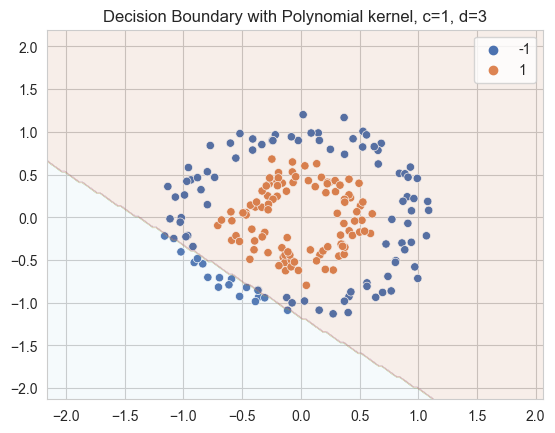

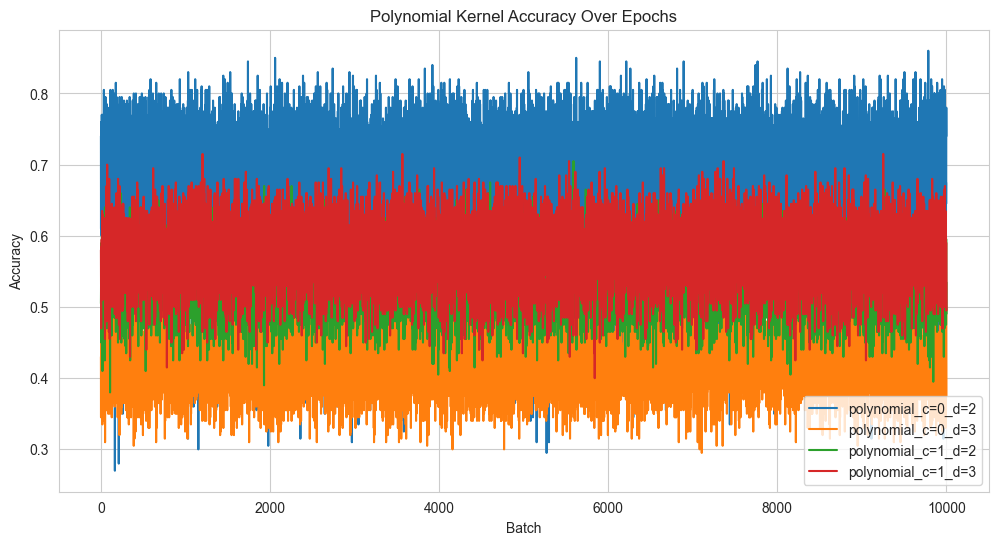

In [16]:
np.random.seed(42)
def polynomial_kernel(x, t, c=1, d=3):
    return (np.dot(x, t.T) + c) ** d

# Set up mesh grid
abscissa_min, abscissa_max = x_vals[:, 0].min()-1, x_vals[:, 0].max()+1
ordinate_min, ordinate_max = x_vals[:, 1].min()-1, x_vals[:, 1].max()+1
h = .025  # step size in the mesh
xx, yy = np.meshgrid(np.arange(abscissa_min, abscissa_max, h), np.arange(ordinate_min, ordinate_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]

c_values = [0, 1]
d_values = [2, 3]
results_polynomial = {}

for c in c_values:
    for d in d_values:
        print(f"Training with Polynomial kernel... c={c}, d={d}")

        # Initialize the SVM with the Polynomial kernel
        clf = svm.SVC(kernel=lambda x, y: polynomial_kernel(x, y, c=c, d=d), max_iter=1, tol=0.001)

        # Training loop
        batch_accs = []
        for i in range(epochs):
            batch_idxs = np.random.choice(N, size=batch_size)
            batch_x = x_vals[batch_idxs]
            batch_t = t_vals[batch_idxs]
            clf.fit(batch_x, batch_t)

            accuracy = clf.score(batch_x, batch_t)
            batch_accs.append(accuracy)

            if (i+1) % 1000 == 0:
                print("Step #{}".format(i+1))
                print("Accuracy = ", accuracy)

        # Plot decision boundary
        grid_preds = clf.predict(grid_points)
        grid_preds = grid_preds.reshape(xx.shape)
        plt.figure()
        sns.scatterplot(x=x_vals[:,0], y=x_vals[:,1], hue=t_vals, palette="deep")
        plt.contourf(xx, yy, grid_preds, cmap=plt.cm.Paired, alpha=0.1)
        plt.title(f"Decision Boundary with Polynomial kernel, c={c}, d={d}")
        plt.show()

        # Save results for the Gaussian kernel
        key_name = f"polynomial_c={c}_d={d}"
        results_polynomial[key_name] = batch_accs

# Plotting accuracy for the Gaussian kernel
plt.figure(figsize=(12, 6))
for key_name, accs in results_polynomial.items():
    plt.plot(accs, label=key_name)
plt.legend()
plt.xlabel("Batch")
plt.ylabel("Accuracy")
plt.title("Polynomial Kernel Accuracy Over Epochs")
plt.show()

## Task:
### (b)
*Which of these performs best on the data, in terms of speed and quality? Do not forget to set the random seed to receive reproducible results.*

A = In terms of speed the linear decision was the easiest and quickest to plot. The RBF and Polynomal took more time to compile and train byt the best decision boundary was the RBF.

### (c)
*Test different values of $c$ and $d$ for the polynomial kernel. Which of them work best?*

In general a polynomial kernel doesnt generate a good decision boundary but the values with the higher accuracy where $c = 0$ and $d=2$

### (d)
*Test different values of $\gamma$ for the RBF kernel. Which of them works best?*

R= Lower values performed better than bigger ones but a value of $\gamma = 1$ it is the closest to the decision boundary

### (e)
*Change the part of the code which generates the data such that it becomes linearly separable.*

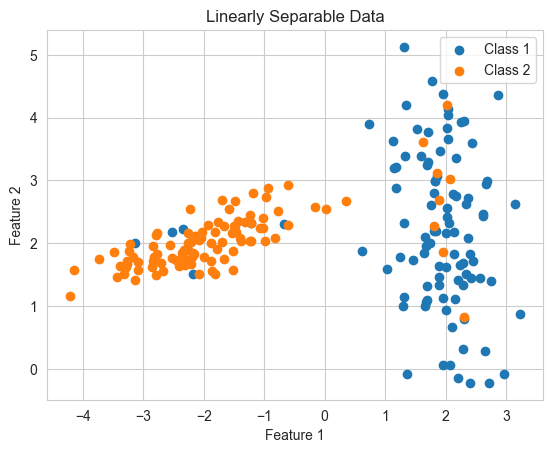

In [27]:
np.random.seed(0)
N = 200 # number of samples
noise = 0.1 # noise parameter

# generate linearly separable data
x_vals_lin, t_vals_lin = datasets.make_classification(n_samples=N, n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1, flip_y=noise, class_sep=2)
# if a value in y_vals is 1, we leave it at one, but if it is 0, we set it to -1
t_vals_lin = np.where(t_vals_lin, 1, -1)

class1_idxs = np.flatnonzero(t_vals_lin== 1)
class1_x = x_vals_lin[class1_idxs]
class1_t = t_vals_lin[class1_idxs]
class2_idxs = np.flatnonzero(t_vals_lin == -1)
class2_x = x_vals_lin[class2_idxs]
class2_t = t_vals_lin[class2_idxs]

plt.scatter(class1_x[:, 0], class1_x[:, 1], label="Class 1")
plt.scatter(class2_x[:, 0], class2_x[:, 1], label="Class 2")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Data")
plt.grid(True)
plt.show()

### (f)
*Re-evaluate the three kernels. Do you get the same result?*

In [28]:
h = .02  # step size in the mesh
x_min, x_max = x_vals[:, 0].min() - 1, x_vals[:, 0].max() + 1
y_min, y_max = x_vals[:, 1].min() - 1, x_vals[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Training with linear kernel...
Step #1000
Accuracy =  0.865
Step #2000
Accuracy =  0.61
Step #3000
Accuracy =  0.11
Step #4000
Accuracy =  0.875
Step #5000
Accuracy =  0.09
Step #6000
Accuracy =  0.945
Step #7000
Accuracy =  0.705
Step #8000
Accuracy =  0.26
Step #9000
Accuracy =  0.1
Step #10000
Accuracy =  0.11


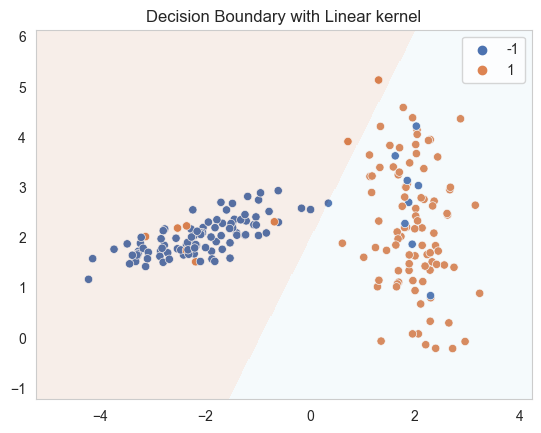

Training with gaussian kernel, gamma=0.2
Training with gaussian kernel, gamma=0.8
Training with gaussian kernel, gamma=1
Training with gaussian kernel, gamma=5
Training with gaussian kernel, gamma=10
Step #1000
Accuracy =  0.43
Step #2000
Accuracy =  0.45
Step #3000
Accuracy =  0.47
Step #4000
Accuracy =  0.485
Step #5000
Accuracy =  0.485
Step #6000
Accuracy =  0.48
Step #7000
Accuracy =  0.53
Step #8000
Accuracy =  0.475
Step #9000
Accuracy =  0.485
Step #10000
Accuracy =  0.45


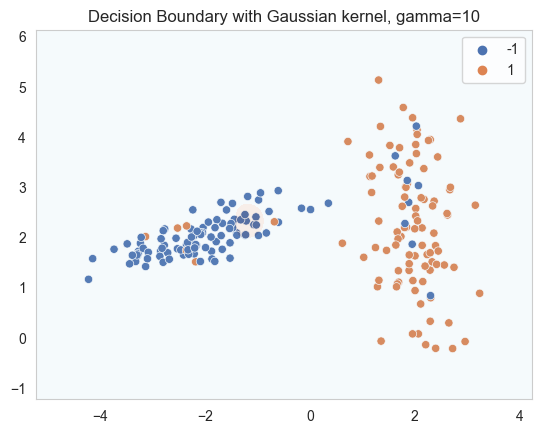

Training with polynomial kernel, c=0, d=2
Training with polynomial kernel, c=0, d=3
Training with polynomial kernel, c=1, d=2
Training with polynomial kernel, c=1, d=3
Step #1000
Accuracy =  0.505
Step #2000
Accuracy =  0.79
Step #3000
Accuracy =  0.605
Step #4000
Accuracy =  0.375
Step #5000
Accuracy =  0.6
Step #6000
Accuracy =  0.825
Step #7000
Accuracy =  0.36
Step #8000
Accuracy =  0.395
Step #9000
Accuracy =  0.87
Step #10000
Accuracy =  0.895


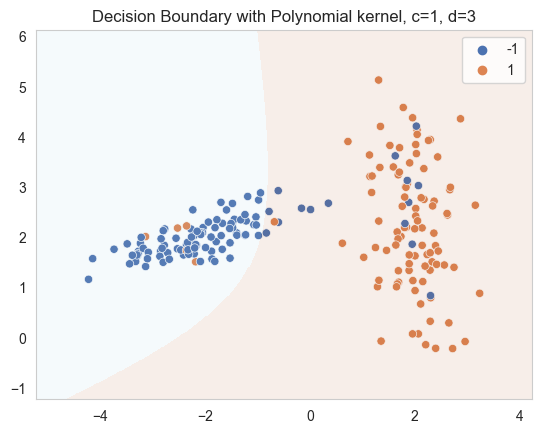

In [29]:
def my_kernel(x, t, type='linear', gamma=1.0, c=1, d=3):
    if type == 'linear':
        return np.dot(x, t.T)
    elif type == 'gaussian':
        distance = np.sum(x**2, 1).reshape(-1, 1) + np.sum(t**2, 1) - 2 * np.dot(x, t.T)
        return np.exp(-gamma * distance)
    elif type == 'polynomial':
        return (np.dot(x, t.T) + c) ** d
    else:
        return np.dot(x, t.T)  # default to linear

kernel_types = ['linear', 'gaussian', 'polynomial']
results = {}

# Define gamma, c, and d values you want to test
gamma_values = [0.2, 0.8, 1, 5, 10]
c_values = [0, 1]
d_values = [2, 3]

for k_type in kernel_types:
    # Lists to store metrics for the current kernel
    batch_accs = []

    if k_type == 'linear':
        # For linear, we do not need to iterate over gamma, c, and d values
        print(f"Training with {k_type} kernel...")
        clf = svm.SVC(kernel=lambda x, y: my_kernel(x, y, type=k_type), max_iter=1, tol=0.001)
        key_name = f"{k_type}"

    elif k_type == 'gaussian':
        for gamma in gamma_values:
            print(f"Training with {k_type} kernel, gamma={gamma}")
            clf = svm.SVC(kernel=lambda x, y: my_kernel(x, y, type=k_type, gamma=gamma), max_iter=1, tol=0.001)
            key_name = f"{k_type}_gamma={gamma}"

    elif k_type == 'polynomial':
        for c in c_values:
            for d in d_values:
                print(f"Training with {k_type} kernel, c={c}, d={d}")
                clf = svm.SVC(kernel=lambda x, y: my_kernel(x, y, type=k_type, c=c, d=d), max_iter=1, tol=0.001)
                key_name = f"{k_type}_c={c}_d={d}"

    # Training loop for all kernel types
    for i in range(epochs):
        batch_idxs = np.random.choice(N, size=batch_size)
        batch_x = x_vals_lin[batch_idxs]
        batch_t = t_vals_lin[batch_idxs]
        clf.fit(batch_x, batch_t)

        accuracy = clf.score(batch_x, batch_t)
        batch_accs.append(accuracy)

        if (i+1)%1000 == 0:
            print("Step #{}".format(i+1))
            print("Accuracy = ", accuracy)

    # Save results for the current kernel
    results[key_name] = batch_accs

    # Plotting decision boundary
    grid_preds = clf.predict(grid_points)
    grid_preds = grid_preds.reshape(xx.shape)
    plt.figure()
    sns.scatterplot(x=x_vals[:,0], y=x_vals[:,1], hue=t_vals, palette="deep")
    plt.pcolormesh(xx, yy, grid_preds, cmap=plt.cm.Paired, alpha=0.1)
    if k_type == 'linear':
        plt.title(f"Decision Boundary with Linear kernel")
    elif k_type == 'gaussian':
        plt.title(f"Decision Boundary with Gaussian kernel, gamma={gamma}")
    elif k_type == 'polynomial':
        plt.title(f"Decision Boundary with Polynomial kernel, c={c}, d={d}")
    plt.show()

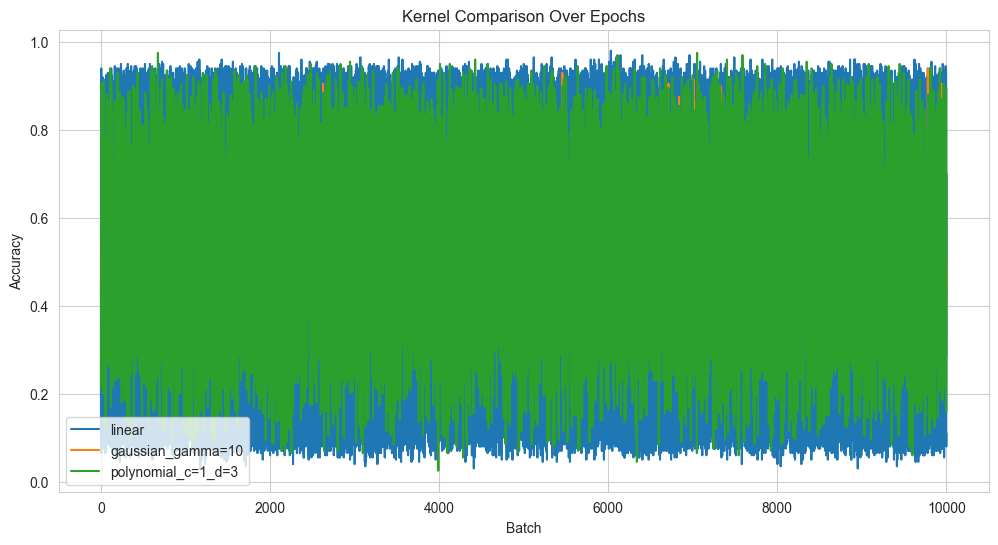

In [30]:
# Plotting accuracy evolution
plt.figure(figsize=(12, 6))
for key_name, accs in results.items():
    plt.plot(accs, label=key_name)
plt.legend()
plt.xlabel("Batch")
plt.ylabel("Accuracy")
plt.title("Kernel Comparison Over Epochs")
plt.show()